In [9]:
source("/home/mnl/Statistik/masterthesis/code/modify_compute_elastic_mean.R")
set.seed(18)

# TURN WARNINGS OFF GLOBALLY, CAREFUL!
oldw <- getOption("warn")
options(warn = -1)
#options(warn = oldw)

# Display plots in smaller size
options(repr.plot.width=6, repr.plot.height=6)

# Elastic Procrustes Means
Means are calculated for some simulated and real world datasets.

#### Define some functions for rotating and scaling planar curves

In [4]:
rand_rotate_curve2d <- function(x){
  # rotate dataframe of 2D vectors randomly
  theta <- 2*pi*runif(1)
  mat <- matrix(c(cos(theta), sin(theta), -sin(theta), cos(theta)), nrow = 2, ncol = 2)
  x.rot <- as.matrix(x) %*% t(mat)
  as.data.frame(x.rot)
}
rand_scale_curve2d <- function(x){
  # scale dataframe of 2D vectors randomly
  beta <- 0.5 + 0.5*runif(1)
  beta * x
}

### Datasets

#### Simulated spirals with random rotation and scaling

In [12]:
curve <- function(t){
  rbind(t*cos(13*t), t*sin(13*t))
}

data_curves <- lapply(1:4, function(i){
  m <- sample(10:15, 1)
  delta <- abs(rnorm(m, mean = 1, sd = 0.05))
  t <- cumsum(delta)/sum(delta)
  data.frame(t(curve(t)) + 0.07*t*matrix(cumsum(rnorm(2*length(delta))), ncol = 2))
})


data_curves <- lapply(data_curves, rand_rotate_curve2d)
data_curves <- lapply(data_curves, rand_scale_curve2d)
data_curves <- lapply(data_curves, center_curve)

#### Digits3 dataset

In [6]:
d3_curves <- shapes::digit3.dat
d3_curves <- apply(d3_curves, MARGIN = 3, FUN = function(i){
  data.frame(X1 = i[,1], X2 = i[,2])
})
d3_curves <- lapply(d3_curves, center_curve)

### Calculate Elastic Procrustes Means
#### Simulated Spirals

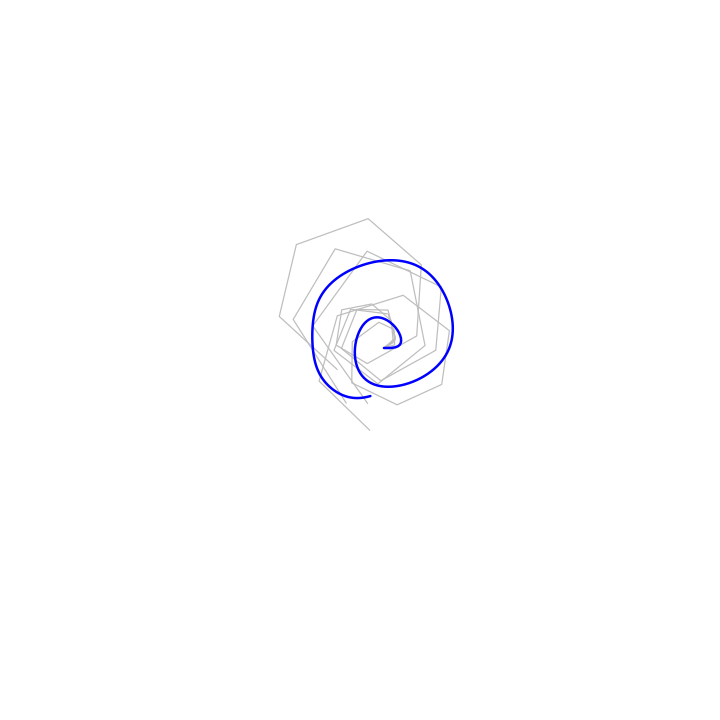

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

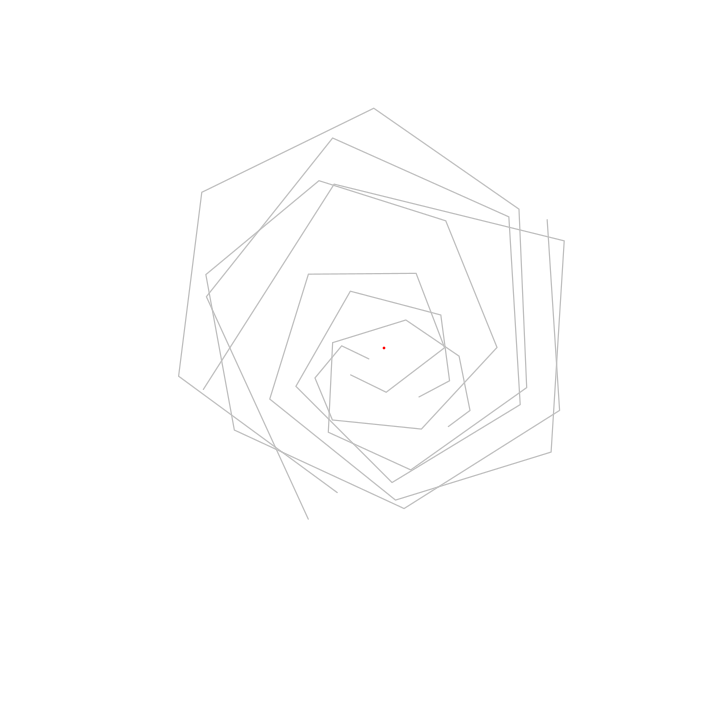

In [13]:
knots <- seq(0,1, length = 11)
smooth_elastic_mean <- compute_elastic_mean(data_curves, knots = knots)

#plot result
plot.new( )
plot.window( xlim=c(-1,1), ylim=c(-1,1), asp = 1)
lapply(data_curves, lines, col = "gray")
lines(get_evals(smooth_elastic_mean), type = "l", col = "red", lwd = 2)

#### Digits3

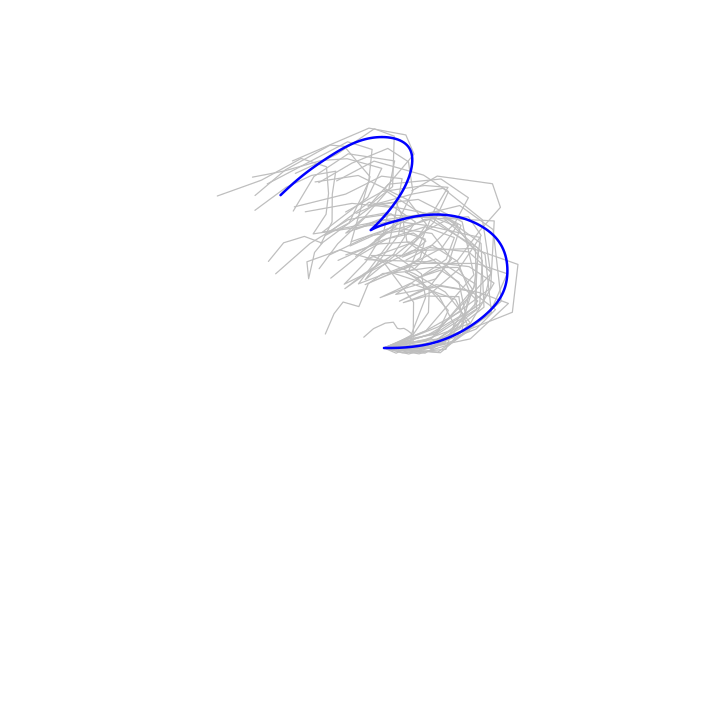

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]
NULL

[[19]]
NULL

[[20]]
NULL

[[21]]
NULL

[[22]]
NULL

[[23]]
NULL

[[24]]
NULL

[[25]]
NULL

[[26]]
NULL

[[27]]
NULL

[[28]]
NULL

[[29]]
NULL

[[30]]
NULL

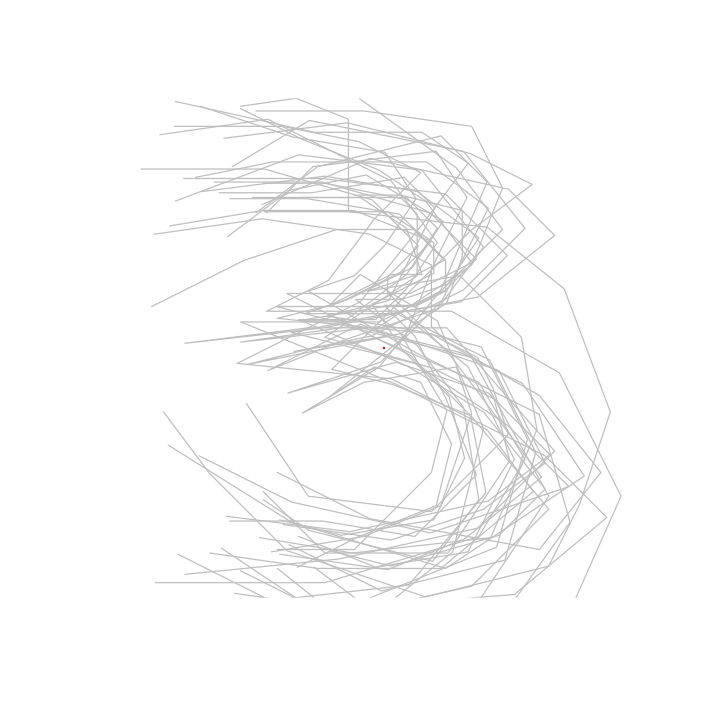

In [11]:
knots <- seq(0,1, length = 30)
smooth_elastic_mean <- compute_elastic_mean(d3_curves, knots = knots)

#plot result
plot.new( )
plot.window( xlim=c(-15,15), ylim=c(-15,15), asp = 1)
lapply(d3_curves, lines, col = "gray")
lines(get_evals(smooth_elastic_mean), type = "l", col = "red", lwd = 2)

In [17]:
smooth_elastic_mean

$type
[1] "smooth"

$coefs
                X1          X2
 [1,]  0.108564364  0.00000000
 [2,] -0.060592428 -0.02881088
 [3,]  0.058274630 -0.04373718
 [4,]  0.056066727  0.05670261
 [5,] -0.022195097  0.07075295
 [6,] -0.068515529  0.02291034
 [7,] -0.065652280 -0.04085635
 [8,] -0.009978807 -0.06383099
 [9,]  0.015475972 -0.05687204
[10,]  0.048303100 -0.02779336
[11,]  0.057357804  0.01773082

$knots
 [1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

$data_curves
$data_curves[[1]]
            t    t_optim          V1         V2
1  0.00000000 0.00000000  0.15154201 -0.2116685
2  0.02435705 0.04090293  0.28368331 -0.1417395
3  0.07112646 0.06094969  0.24583211  0.1428252
4  0.13707874 0.10886058 -0.14570082  0.2456732
5  0.21431579 0.16863527 -0.38118592 -0.1657879
6  0.31019412 0.25382188  0.03475849 -0.5821110
7  0.41594660 0.35241066  0.58936731 -0.2448390
8  0.54851042 0.46735404  0.54021915  0.5673532
9  0.68461251 0.60274233 -0.22229854  0.9086051
10 0.82755515 0.75355701 -0.7685